In [45]:
import matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [4]:
data = pd.read_csv(r"Sales.csv")

In [5]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.shape


(200, 4)

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.isnull().count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

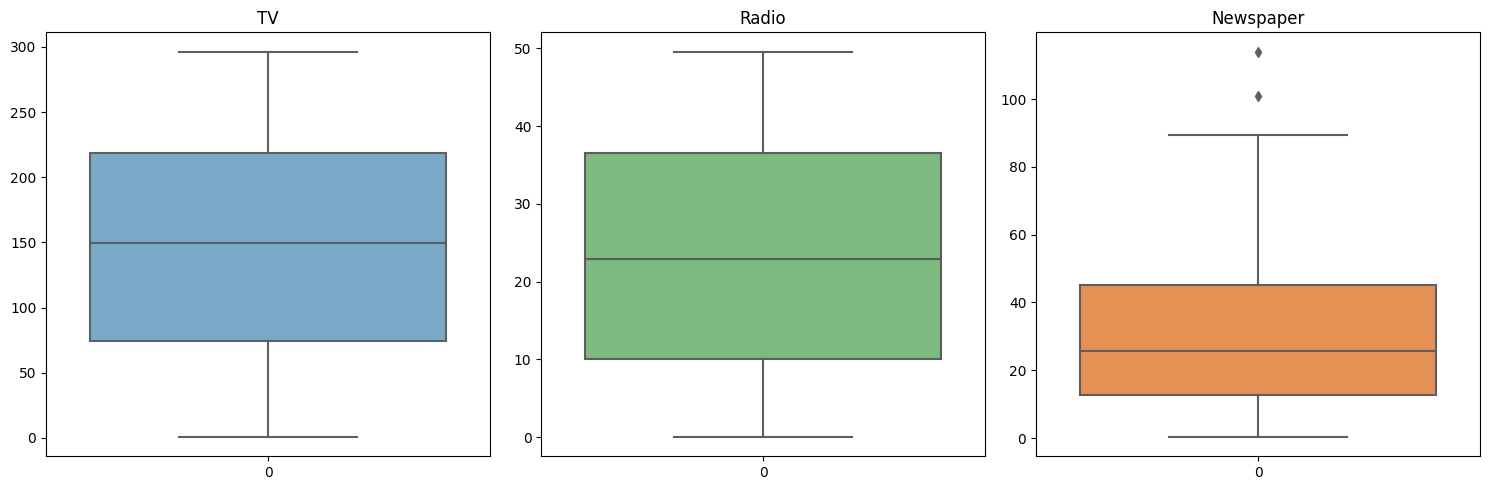

In [52]:
# outlier analysis
fig, axs = plot.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=data['TV'], ax=axs[0], palette='Blues')
sns.boxplot(data=data['Radio'], ax=axs[1], palette='Greens')
sns.boxplot(data=data['Newspaper'], ax=axs[2], palette='Oranges')
axs[0].set_title('TV')
axs[1].set_title('Radio')
axs[2].set_title('Newspaper')
plot.tight_layout()
plot.show()

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


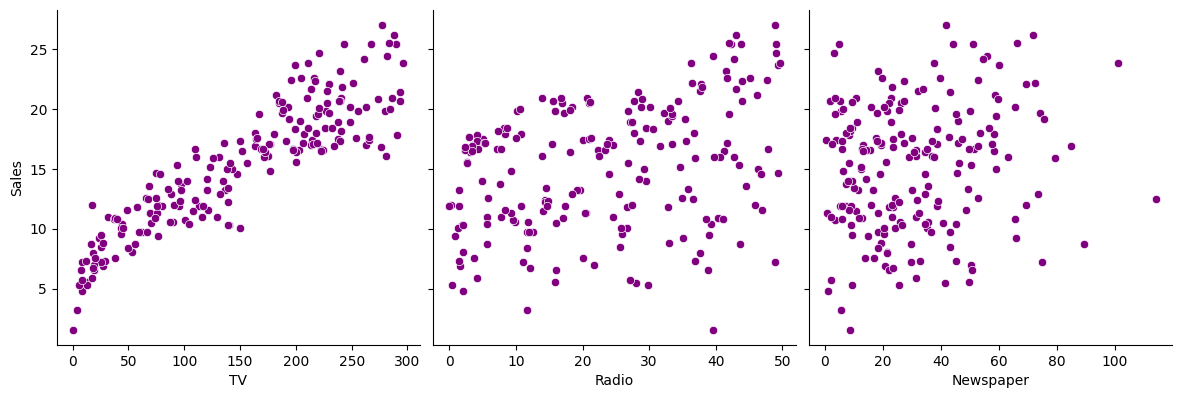

In [53]:
# EDA
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter', plot_kws={'color': 'purple'})


<Axes: >

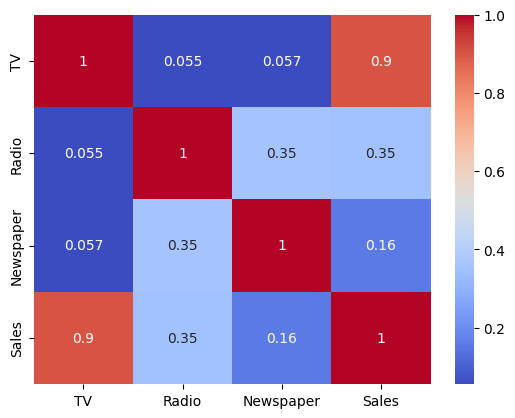

In [22]:
# heatmap
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)


In [23]:
# linear regression
x = data['TV']
y = data["Sales"]

In [28]:
# test split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x,y,train_size = 0.3,random_state = 100)

In [29]:
X_Train.head()


68     237.4
188    286.0
156     93.9
30     292.9
106     25.0
Name: TV, dtype: float64

In [30]:
Y_Train.head()

68     18.9
188    20.9
156    15.3
30     21.4
106     7.2
Name: Sales, dtype: float64

In [32]:
X_Train_sm = sm.add_constant(X_Train)

In [34]:
lr = sm.OLS(Y_Train ,X_Train_sm).fit()
lr.params

const    6.054388
TV       0.062969
dtype: float64

In [35]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     436.6
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.13e-28
Time:                        17:43:53   Log-Likelihood:                -130.28
No. Observations:                  60   AIC:                             264.6
Df Residuals:                      58   BIC:                             268.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0544      0.487     12.421      0.0

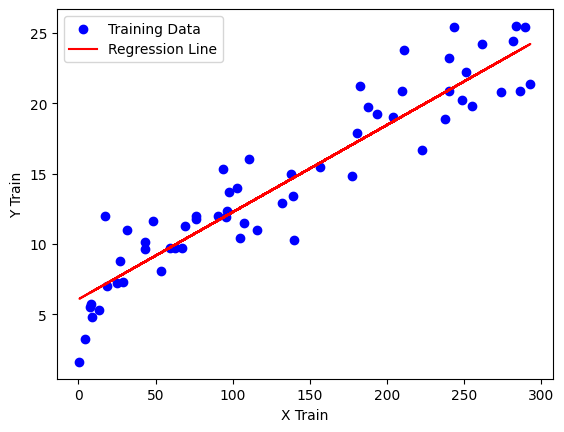

In [37]:
plot.scatter(X_Train, Y_Train, color='blue', label='Training Data')
plot.plot(X_Train, 6.054 + 0.062 * X_Train, color='red', label='Regression Line')
plot.xlabel('X Train')
plot.ylabel('Y Train')
plot.legend()
plot.show()

In [38]:
Y_Train_P = lr.predict(X_Train_sm)
res = (Y_Train-Y_Train_P)

C:\Users\shubh\AppData\Local\Temp\ipykernel_14944\3264717253.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15, color='purple')


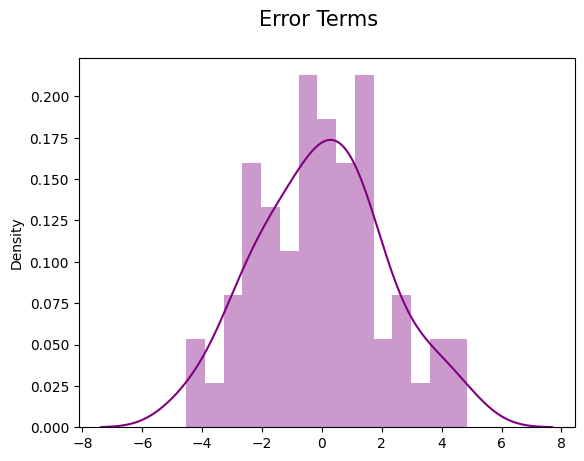

In [40]:
fig = plot.figure()
sns.distplot(res, bins=15, color='purple')
fig.suptitle('Error Terms', fontsize=15)
plot.show()

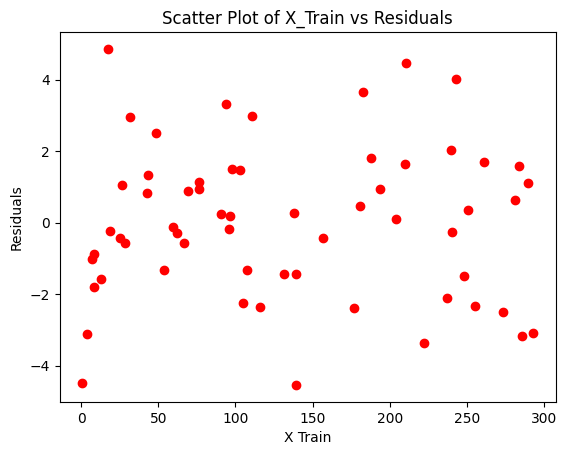

In [43]:
plot.scatter(X_Train, res, color='red')
plot.xlabel('X Train')
plot.ylabel('Residuals')
plot.title('Scatter Plot of X_Train vs Residuals')
plot.show()

In [44]:
X_Test_sm = sm.add_constant(X_Test)
Y_Train_P = lr.predict(X_Test_sm)
Y_Train_P.head()

126     6.545549
104    21.053685
99     14.567843
92     19.762814
111    21.274078
dtype: float64

In [46]:
np.sqrt(mean_squared_error(Y_Test,Y_Train_P))

2.482263165059354

In [48]:
r_squared = r2_score(Y_Test,Y_Train_P)
r_squared

0.7310400426976638

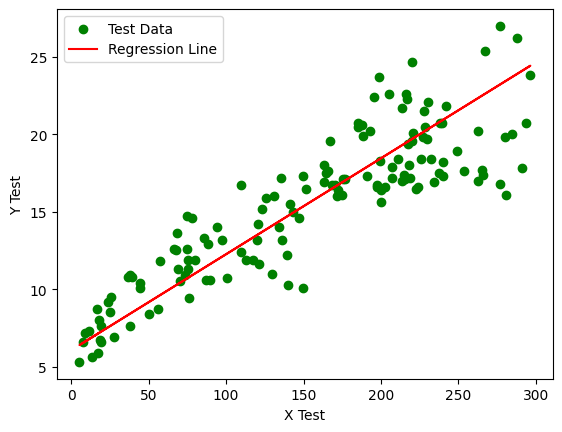

In [50]:
plot.scatter(X_Test, Y_Test, color='green', label='Test Data')
plot.plot(X_Test, 6.054 + 0.062*X_Test, color='red', label='Regression Line')
plot.xlabel('X Test')
plot.ylabel('Y Test')
plot.legend()
plot.show()